# Crear una Red Neuronal

## Importar las librerías

In [51]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

%matplotlib inline

|Librería|Función|
|--------|-------|
|Numpy|Procesamiento Numérico|
|Scipy|Extensión de Numpy|
|Pyplot|Framework de gráficos|
|make_circles|Nos permite crear un dataset|

## Crear un dataset

Si queremos observar como hacer uso de make_circles podemos ingresar el siguiente script:

```python
make_circles?
```

Creamos 500 elementos con 2 características cada uno. 

In [52]:
n = 500
p = 2

In [53]:
X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)

|Var||
|--|--|
|X|Puntos en (x,y) del eje cartesiano|
|Y|Valores binarios (0,1) que dicen que pertenecen al ciclo interno o externo|
|factor|Distancia entre los círculos|
|noise|Ruido|

Con la siguiente línea agregamos una dimensión para que quede igual que X

In [54]:
Y = Y[:, np.newaxis]

In [55]:
print('Dataset X = {}'.format(X.shape))
print('Dataset Y = {}'.format(Y.shape))

Dataset X = (500, 2)
Dataset Y = (500, 1)


Visualizamos el dataset, graficando todos los puntos en la primera coordenada en X y los segundos puntos en la coordenada Y

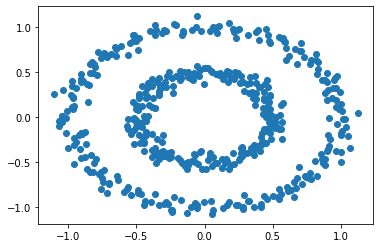

In [56]:
plt.scatter(X[:, 0], X[:, 1])

Mejoramos el gráfico agregando color e igualando el tamaño de los ejes

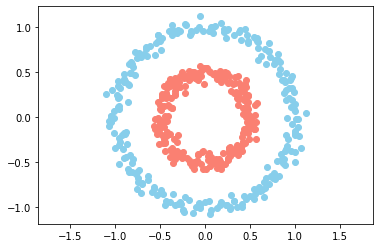

In [57]:
plt.scatter(X[Y[:,0]==0,0], X[Y[:,0]==0,1], c='skyblue')
plt.scatter(X[Y[:,0]==1,0], X[Y[:,0]==1,1], c='salmon')
plt.axis('equal')
plt.show()

## Crear la Red Neuronal

|Estructura de los datos en la red||
|--||
|Parametros de entrada||
|Conexiones entre las capas|n_conn|
|Número de neuronas en las capas|n_neur|
|Función de activación|f_wakeup|

Creamos una clase de capa de la red. Tener en cuenta que ***b*** es el vector parametro de Bayas *(layers de la red neuronal)* con valores entre -1 y 1; y ***w*** es una matriz layer *(conexiones son tantas como neuronas en cada capa)*

In [58]:
class neural_layer():
    def __init__(self, n_conn, n_neur, f_wakeup):
        self.f_wakeup = f_wakeup
        self.b = np.random.rand(1, n_neur) * 2 - 1
        self.w = np.random.rand(n_conn, n_neur) * 2 - 1

### Funciones de activación

**lambda** permite crear funciones anónimas, es decir que no requiren de un nombre ni la palabra reservada *def*. Funciones de activación de las neuronas, hacemos uso de una función sigmoidal $\sigma(x)$:

$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

Tambien podemos establecer que $z$ equivale a nuestra suma ponderada de entrada y podemos pasarla a través de la función sigmoide.

$$ z = b + \sum_i w_ix_i$$

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

In [59]:
sigma = lambda x: 1/(1 + np.e**(-x))

También podemos convertir a sigma en 2 funciones, una sería la función sigmoide y la derivada de dicha función.

$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$  

$$ \sigma(x) = x * (1-x) $$   

$$ \sigma'(z) = \sigma(z) * (1 - \sigma(z)) $$

In [60]:
sigma = (lambda x: 1/(1 + np.e**(-x)), lambda x: x * (1 - x))

Es importante decirle que todos los valores negativos sean 0

In [61]:
relu = lambda x: np.maximum(0, x)

### Probemos la función sigmoide.

Primero creamos un vector de 100 posiciones con valores desde -5 a 5


In [62]:
_x= np.linspace(-5,5, 100)
_x

array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
       -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909,
       -3.98989899, -3.88888889, -3.78787879, -3.68686869, -3.58585859,
       -3.48484848, -3.38383838, -3.28282828, -3.18181818, -3.08080808,
       -2.97979798, -2.87878788, -2.77777778, -2.67676768, -2.57575758,
       -2.47474747, -2.37373737, -2.27272727, -2.17171717, -2.07070707,
       -1.96969697, -1.86868687, -1.76767677, -1.66666667, -1.56565657,
       -1.46464646, -1.36363636, -1.26262626, -1.16161616, -1.06060606,
       -0.95959596, -0.85858586, -0.75757576, -0.65656566, -0.55555556,
       -0.45454545, -0.35353535, -0.25252525, -0.15151515, -0.05050505,
        0.05050505,  0.15151515,  0.25252525,  0.35353535,  0.45454545,
        0.55555556,  0.65656566,  0.75757576,  0.85858586,  0.95959596,
        1.06060606,  1.16161616,  1.26262626,  1.36363636,  1.46464646,
        1.56565657,  1.66666667,  1.76767677,  1.86868687,  1.96

Función Sigmoide

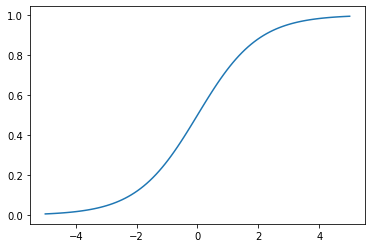

In [63]:
plt.plot (_x, sigma[0](_x))

Derivada de la función Sigmoide

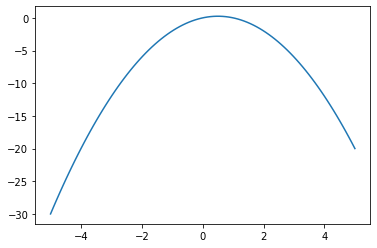

In [64]:
plt.plot (_x, sigma[1](_x))

Derivada de la función Sigmoide

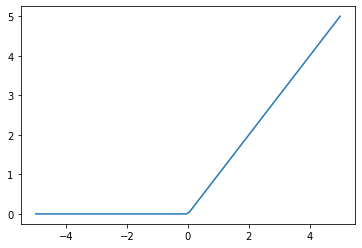

In [65]:
plt.plot (_x, relu(_x))

### Función de coste (Error cuadrático medio = L2)

Por medio de la primera función se obtiene el error cuadrático medio de la diferencia entre Yp *(Valor Predicho)* y Yr *(Valor Real)*. Y por medio de la segunda función obtenemos la derivada de la función de error cuadrático medio.  

In [66]:
l2_cost = (lambda Yp, Yr: np.mean((Yp-Yr)**2), lambda Yp, Yr: (Yp - Yr))

### Creación de la red neuronal por método manual

In [67]:
l0 = neural_layer(p, 4, sigma)
l1 = neural_layer(4, 8, sigma)

Capa 0 con p *(número de entradas)*

### Creación de la red neuronal por método automático


In [68]:
def create_nn(topology, f_wakeup):
    nn = []
    for l, layer in enumerate(topology[:-1]):
        nn.append(neural_layer(topology[l], topology[l+1], f_wakeup))
    return nn

- `nn` son las capas de red neuronal
- Por medio del ciclo for recorre el vector hasta el último valor. 
    - Creamos cada una de las capas por medio de la clase neural_layer.

## Crear la función de entrenamiento

Le entregamos a la nn un parámetro de entrada y como es la salida, ella misma aprende a asignar pesos hacia adelante aplicando sumas ponderadas y funciones de activación ($\sigma$), para obtener un valor randomico aplicando una función de coste (Error cuadrático medio = L2). Comparamos el valor de salida randomico - valor real y obtenemos el valor del error. Tomando ese error y aplicandolo al algoritmo de back-propagation calculamos las derivadas parciales que usaremos para usar el algoritmo de descenso por gradiente, el cual nos permite optimizar el error de coste y cin ello entrenar la nn. La topología define la cantidad de neuronas en cada capa.

In [69]:
topology = [p, 4, 8, 1]
neural_net = create_nn(topology, sigma)

Dentro de la función de train, lr define en que grado de actualización los parámetros en base al descenso del gradiente (muy bajo: train lento, muy alto: nunca converge la red). *forward pass* hace el paso hacia adelante, pasamos el vector de entrada y lo pasamos capa por capa.  

En la capa 0 obtenemos la suma ponderada en la primera capa, y luego ejecutamos la activación usando la función sigma [parámetro 0] para la capa 0. El vector `out` almacena los recursos de las capas [(z0, a0)], [(z1, a1)], ... , [(zn, an)]. Por medio del ciclo for cargamos el valor inicial que se usara en la primera capa (entrada) de forma automática. Como vimos anteriormente, `z` es la suma ponderada de la primera capa, y el papel de `a` es ejecutar la función de activación usando la función sigma[0] para la capa 0.  

Al aplicar backwards pass + gradian descent, vamos hacia atras para programar el error y ejecutar (derivada + decenso del gradiente). Si es la última capa no se debe programar el error porque es el mismo de la función de coste. Con deltas[0] agregamos el valor del coste por la derivada de la función de activación de la última capa. Con deltas[1>] agregamos el valor del coste por la derivada de la función de activación de la capa anterior. En la variable _W guardamos el valor temporal de W para ser usado en la siguiente iteración del for. El descenso del gradiente optimiza el coste en función del parametro W.

In [70]:
def train(neural_net, X, Y, l2_cost, lr=0.05, train=True):
    # Capa 0
    z = X@ neural_net[0].w + neural_net[0].b
    a = neural_net[0].f_wakeup[0](z)

    out = [(None, X)]

    for l, layer in enumerate(neural_net):
        z = out[-1][1] @ neural_net[l].w + neural_net[l].b
        a = neural_net[l].f_wakeup[0](z)
        out.append((z, a))
    # print(out[-1][1])
    # print('Costo de aprendizaje = {}'.format(l2_cost[0](out[-1][1], Y)))

    # Backwards pass + Gradian descent
    if train:
        deltas = []

        for l in reversed(range(0, len(neural_net))):
            z = out[l+1][0]
            a = out[l+1][1]
            # print('Tamaño de la capa {} = {}'.format(l, a.shape))
            if l == len(neural_net)-1:
                deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].f_wakeup[1](a))
            else:
                # print(delta[0].shape, _W.shape)
                deltas.insert(0, deltas[0] @ _W.T * neural_net[l].f_wakeup[1](a))
        
            # Gradiant Descent
            _W = neural_net[l].w
            neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
            neural_net[l].w = neural_net[l].w - out[l][1].T @ deltas[0] * lr

    return out[-1][1]

In [71]:
train(neural_net, X, Y, l2_cost, 0.01, True)

array([[0.87075702],
       [0.86718136],
       [0.87625721],
       [0.87855068],
       [0.88045253],
       [0.87207284],
       [0.86802088],
       [0.86564298],
       [0.85415939],
       [0.85650461],
       [0.8637798 ],
       [0.86421998],
       [0.86126264],
       [0.87372179],
       [0.88708141],
       [0.86586693],
       [0.87148743],
       [0.85990946],
       [0.86867643],
       [0.88407755],
       [0.87600595],
       [0.86361345],
       [0.86549552],
       [0.87487858],
       [0.87973336],
       [0.88049646],
       [0.86339267],
       [0.85417275],
       [0.86499269],
       [0.86114055],
       [0.8663022 ],
       [0.87516342],
       [0.86600521],
       [0.85404613],
       [0.86282088],
       [0.86346521],
       [0.86079013],
       [0.87605138],
       [0.88698848],
       [0.88051154],
       [0.87459604],
       [0.8859137 ],
       [0.87915032],
       [0.88712943],
       [0.8562344 ],
       [0.87664694],
       [0.86888969],
       [0.870

## Entrenamos la Red

In [72]:
import time
from IPython.display import clear_output

In [73]:
neural_n = create_nn(topology, sigma)
loss = []

Por medio de n cantidad de ciclos, entenamos la red con un radio de aprendizaje de 0.05, luego se imprime la perdida de cada una de las epochs (ciclos de entrenamiento).

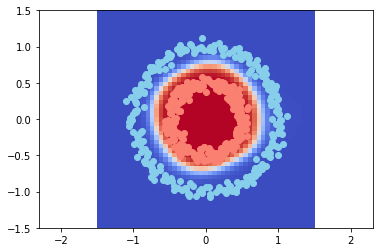

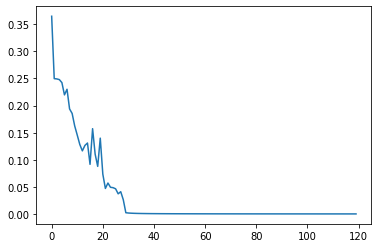

In [74]:
for i in range(3000):
    pY = train(neural_n, X, Y, l2_cost, lr=0.05)
    # print('Ciclo {} --> loss {}'.format(i, pY))

    if i % 25 == 0:
        loss.append(l2_cost[0](pY, Y))
        res = 50
        _x0 = np.linspace(-1.5, 1.5, res)
        _x1 = np.linspace(-1.5, 1.5, res)
        _Y = np.zeros((res, res))

        for i0, x0 in enumerate(_x0):
            for i1, x1 in enumerate(_x1):
                _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]
        
        plt.pcolormesh(_x0, _x1, _Y, cmap='coolwarm')
        plt.axis('equal')

        plt.scatter(X[Y[:, 0]==0,0], X[Y[:, 0]==0,1], c='skyblue')
        plt.scatter(X[Y[:, 0]==1,0], X[Y[:, 0]==1,1], c='salmon')

        clear_output(wait=True)
        plt.show()
        plt.plot(range(len(loss)), loss)
        plt.show()
        time.sleep(0.5)